## Data Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
import pickle
import seaborn as sns
import eli5
import shap
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from xgboost.sklearn import XGBClassifier
from functools import partial
from lime.lime_tabular import LimeTabularExplainer
import sys
import shap
shap.initjs() 

c:\Users\julie.ngan\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<AxesSubplot: >

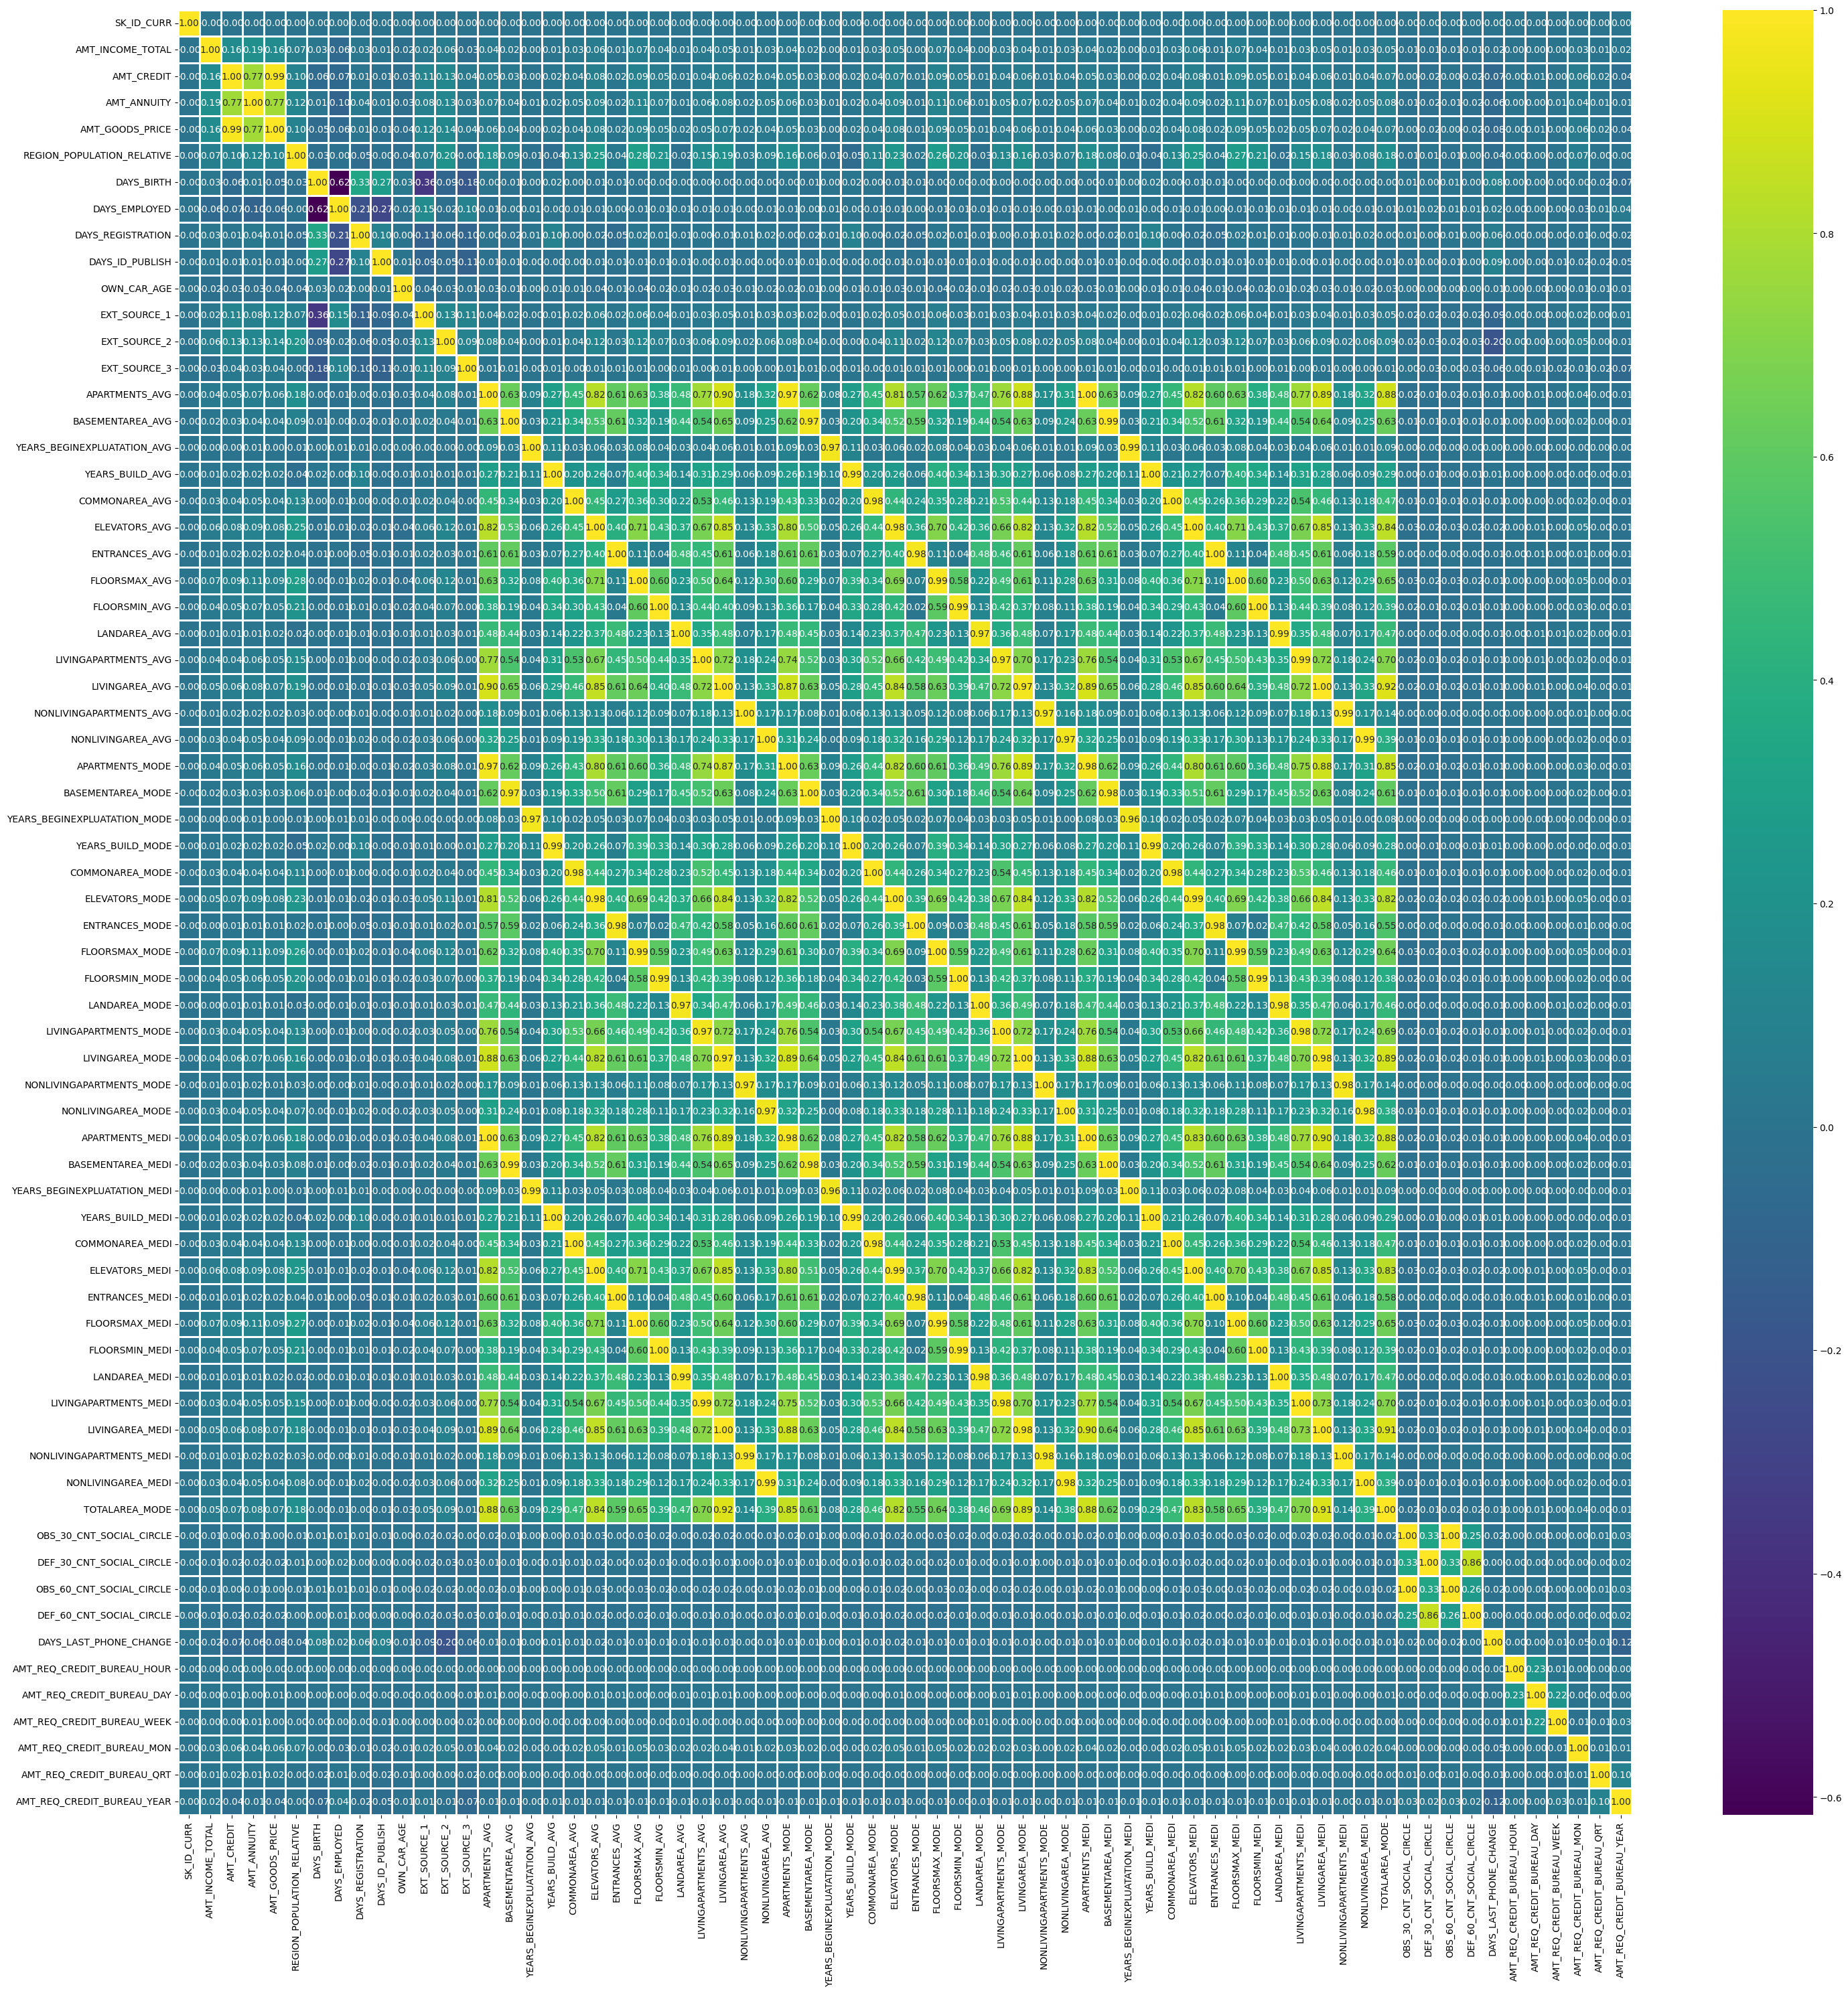

In [2]:
df = pd.read_csv("../data/processed/application_train.csv")
intermediate_train = pd.read_csv("../data/interim/train_before_normalisation.csv")
intermediate_test = pd.read_csv("../data/interim/test_before_normalisation.csv")
raw = pd.read_csv("../data/raw/application_train.csv")

fig, ax= plt.subplots(figsize = (35,35))
sns.heatmap(intermediate_train[["SK_ID_CURR","AMT_INCOME_TOTAL","AMT_CREDIT",
"AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH",
"DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","OWN_CAR_AGE",
"EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","APARTMENTS_AVG","BASEMENTAREA_AVG",
"YEARS_BEGINEXPLUATATION_AVG","YEARS_BUILD_AVG","COMMONAREA_AVG","ELEVATORS_AVG"
,"ENTRANCES_AVG","FLOORSMAX_AVG","FLOORSMIN_AVG","LANDAREA_AVG","LIVINGAPARTMENTS_AVG",
"LIVINGAREA_AVG","NONLIVINGAPARTMENTS_AVG","NONLIVINGAREA_AVG","APARTMENTS_MODE",
"BASEMENTAREA_MODE","YEARS_BEGINEXPLUATATION_MODE","YEARS_BUILD_MODE","COMMONAREA_MODE","ELEVATORS_MODE","ENTRANCES_MODE","FLOORSMAX_MODE","FLOORSMIN_MODE","LANDAREA_MODE",
"LIVINGAPARTMENTS_MODE","LIVINGAREA_MODE","NONLIVINGAPARTMENTS_MODE","NONLIVINGAREA_MODE",
"APARTMENTS_MEDI","BASEMENTAREA_MEDI","YEARS_BEGINEXPLUATATION_MEDI","YEARS_BUILD_MEDI",
"COMMONAREA_MEDI","ELEVATORS_MEDI","ENTRANCES_MEDI","FLOORSMAX_MEDI","FLOORSMIN_MEDI","LANDAREA_MEDI",
"LIVINGAPARTMENTS_MEDI","LIVINGAREA_MEDI","NONLIVINGAPARTMENTS_MEDI","NONLIVINGAREA_MEDI","TOTALAREA_MODE",
"OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE",
"DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE","AMT_REQ_CREDIT_BUREAU_HOUR",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON",
"AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]].corr(),cmap="viridis", annot = True, fmt = ".2f", linewidths=1, ax=ax)

<AxesSubplot: xlabel='TARGET', ylabel='count'>

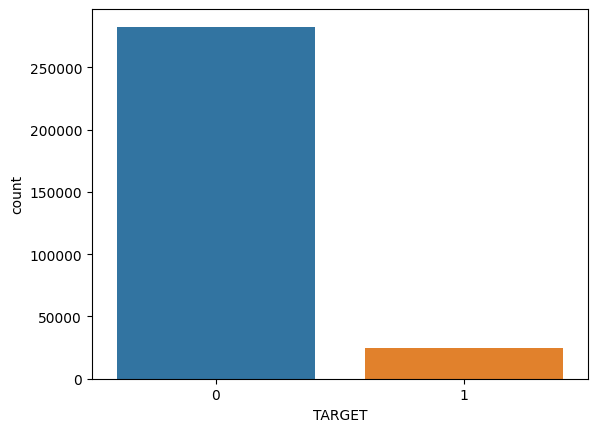

In [3]:
sns.countplot(x='TARGET',data=intermediate_train)

#### Visualise the weights associated to each feature of the XGB boost model

In [8]:
cat_features = pickle.load(open("../data/features/cat_features.pkl",'rb'))
num_features = pickle.load(open("../data/features/num_features.pkl",'rb'))
train = pd.read_csv("../data/processed/application_train.csv")#.set_index('SK_ID_CURR')
X_test = pd.read_csv("../data/processed/application_test.csv")#set_index('SK_ID_CURR')
int_train = pd.read_csv("../data/interim/train_before_normalisation.csv")
y = int_train.TARGET
X_train, X_test = train, train
test = pd.read_csv("../data/raw/application_test.csv").set_index("SK_ID_CURR")
new_path = '../src/features'
if new_path not in sys.path:
    sys.path.append(new_path)

In [9]:
pipeline = pickle.load(open('../models/pipe.pkl', 'rb'))
preprocessor = pipeline.named_steps["preprocessing"]

In [10]:
print("Weights of features")
eli5.show_weights(pipeline.named_steps['clf'])

Weights of features


In [11]:
doc = pd.read_csv("../data/processed/application_test.csv")
record = doc.iloc[0]
eli5.explain_prediction_xgboost(pipeline.named_steps['clf'], doc=record)

Explanation(estimator="XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,\n              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n              early_stopping_rounds=None, enable_categorical=False,\n              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,\n              grow_policy='depthwise', importance_type=None,\n              interaction_constraints='', learning_rate=0.300000012,\n              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,\n              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,\n              missing=nan, monotone_constraints='()', n_estimators=100,\n              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0, ...)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=2.56813447791181, std=None, value=1.0), FeatureWeight(feature='152', weight=0.09723858168222493, std=None, value=1.506879672248598), FeatureWeight(feature='223', weight=0.0343065454000105, std=None, value=-0.206991610605546), FeatureWeight(feature='149', weight=0.013403723904466472, std=None, value=-0.166143321150213), FeatureWeight(feature='106', weight=0.007645366505165584, std=None, value=0.0), FeatureWeight(feature='159', weight=0.007344946200443861, std=None, value=-0.4990130509434402), FeatureWeight(feature='170', weight=0.006659319394641014, std=None, value=-0.2912078747259788), FeatureWeight(feature='165', weight=0.005732718655292848, std=None, value=-0.0626985338920518), FeatureWeight(feature='118', weight=0.000916855057217072, std=None, value=0.0)], neg=[FeatureWeight(feature='175', weight=-0.9438487059208303, std=None, value=-2.153650937474764), FeatureWeight(feature='173', weight=-0.5228371680940738, std=None, value=-3.021877286152298), FeatureWeight(feature='174', weight=-0.31072584870248565, std=None, value=-1.317940277769374), FeatureWeight(feature='3', weight=-0.15007983454593427, std=None, value=1.0), FeatureWeight(feature='150', weight=-0.12488594949878033, std=None, value=-0.5072358178593501), FeatureWeight(feature='220', weight=-0.11139470007688794, std=None, value=4.163504469696982), FeatureWeight(feature='153', weight=-0.05804409139453105, std=None, value=-0.4562151902540676), FeatureWeight(feature='20', weight=-0.05033231316777005, std=None, value=1.0), FeatureWeight(feature='22', weight=-0.04542867074314429, std=None, value=0.0), FeatureWeight(feature='225', weight=-0.042998785154454655, std=None, value=0.6390651950561114), FeatureWeight(feature='148', weight=-0.036337179428818436, std=None, value=-0.4780949616371542), FeatureWeight(feature='139', weight=-0.03343993665110649, std=None, value=1.0), FeatureWeight(feature='156', weight=-0.023014431892348343, std=None, value=-0.1463134859077592), FeatureWeight(fea

In [12]:
def get_processed(num_features):
    ohe_features = preprocessor.transformers[0][1]\
        ['onehot'].get_feature_names(cat_features)
    #new_ohe_features = [f"{col}__{val}" for col, vals in zip(cat_features, ohe_features) for val in vals]
    num_features = pd.DataFrame(num_features)
    #new_ohe_features = pd.DataFrame(new_ohe_features)
    ohe_features = pd.DataFrame(ohe_features)
    all_features = pd.concat([num_features,ohe_features])
    print(all_features)
    print("Nb numerical features",len(num_features))
    print('get processed data')
    processed = pd.read_csv("../data/processed/application_test.csv")
    #processed = processed.drop(columns=["Unnamed: 0"])
    print(len(processed.columns))
    return processed, all_features, ohe_features

In [13]:
processed, all_features, ohe_features = get_processed(num_features)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


                           0
0               CNT_CHILDREN
1           AMT_INCOME_TOTAL
2                 AMT_CREDIT
3                AMT_ANNUITY
4            AMT_GOODS_PRICE
..                       ...
141        FLAG_OWN_REALTY_N
142        FLAG_OWN_REALTY_Y
143   EMERGENCYSTATE_MODE_No
144  EMERGENCYSTATE_MODE_Yes
145  EMERGENCYSTATE_MODE_nan

[250 rows x 1 columns]
Nb numerical features 104
get processed data
251


In [83]:
X_test.iloc[[4]]

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
SK_ID_CURR                                                               
100007             Cash loans           M            N               Y   

            CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                            
100007                 0          121500.0    513000.0      21865.5   

            AMT_GOODS_PRICE NAME_TYPE_SUITE  ... FLAG_DOCUMENT_18  \
SK_ID_CURR                                   ...                    
100007             513000.0   Unaccompanied  ...                0   

           FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
SK_ID_CURR                                                      
100007                    0                0                0   

            AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
SK_ID_CURR                                                          
100007                             0.0                        0.0   

            AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
SK_ID_CURR                                                          
100007                             0.0                        0.0   

            AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
SK_ID_CURR                                                         
100007                            0.0                         0.0  

[1 rows x 120 columns]

In [84]:
y.iloc[4]

0

In [14]:
processed.iloc[4]

Unnamed: 0    4.000000
0             1.000000
1             0.000000
2             0.000000
3             1.000000
                ...   
245          -0.058766
246          -0.155837
247          -0.269947
248          -0.308620
249          -1.007331
Name: 4, Length: 251, dtype: float64

In [15]:
eli5.show_prediction(pipeline.named_steps["clf"], 
                    processed.iloc[4]
                    )

In [16]:
def convert_to_lime_format(X, categorical_names, col_names=None, invert=False):
    if not isinstance(X, pd.DataFrame):
        X_lime = pd.DataFrame(X, columns=col_names)
    else:
        X_lime = X.copy()
    for k, v in categorical_names.items():
        if not invert:
            label_map = {str_label: int_label for int_label, str_label in enumerate(v)}
        else:
            label_map = {int_label: str_label for int_label, str_label in enumerate(v)}
        X_lime.iloc[:, k] = X_lime.iloc[:, k].map(label_map)
    return X_lime

In [17]:
cat_feats = pd.DataFrame(pipeline.named_steps['preprocessing'].transformers[0][2])
print(len(cat_feats))
preprocessor.transformers[0][1]\
    ['onehot'].get_feature_names(cat_features)
categorical_names = cat_features#{}
categorical_names = pd.DataFrame(categorical_names)
"""for col in cat_features:
    categorical_names[X_train.columns.get_loc(col)] = [new_col for new_col in ohe_features]"""
print(categorical_names)
X_lime = convert_to_lime_format(processed, cat_feats)
X_lime = X_lime.drop(columns=['Unnamed: 0'])
X_lime

16
                             0
0           NAME_CONTRACT_TYPE
1                  CODE_GENDER
2              NAME_TYPE_SUITE
3             NAME_INCOME_TYPE
4          NAME_EDUCATION_TYPE
5           NAME_FAMILY_STATUS
6            NAME_HOUSING_TYPE
7              OCCUPATION_TYPE
8   WEEKDAY_APPR_PROCESS_START
9            ORGANIZATION_TYPE
10          FONDKAPREMONT_MODE
11              HOUSETYPE_MODE
12          WALLSMATERIAL_MODE
13                FLAG_OWN_CAR
14             FLAG_OWN_REALTY
15         EMERGENCYSTATE_MODE


Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


0    1    2    3    4    5    6    7    8    9  ...       240  \
0       1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.090534   
1       1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ... -0.090534   
2       0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.090534   
3       1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.090534   
4       1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.090534   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
307506  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.090534   
307507  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.090534   
307508  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.090534   
307509  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.090534   
307510  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.090534   

             241       242       243        244       245       246       247  \
0      -0.024402 -0.022529 -0.018305  -0.070987 -0.058766 -0.155837 -0.269947   
1      -0.024402 -0.022529 -0.018305  -0.070987 -0.058766 -0.155837 -0.269947   
2      -0.024402 -0.022529 -0.018305  -0.070987 -0.058766 -0.155837 -0.269947   
3      -0.024402 -0.022529 -0.018305  -0.070987 -0.058766 -0.155837 -0.269947   
4      -0.024402 -0.022529 -0.018305  -0.070987 -0.058766 -0.155837 -0.269947   
...          ...       ...       ...        ...       ...       ...       ...   
307506 -0.024402 -0.022529 -0.018305  -0.070987 -0.058766 -0.155837 -0.269947   
307507 -0.024402 -0.022529 -0.018305  -0.070987 -0.058766 -0.155837 -0.269947   
307508 -0.024402 -0.022529 -0.018305  12.747224 -0.058766 -0.155837  0.897175   
307509 -0.024402 -0.022529 -0.018305  -0.070987 -0.058766 -0.155837 -0.269947   
307510 -0.024402 -0.022529 -0.018305  -0.070987 -0.058766 -0.155837  2.064297   

            248       249  
0      -0.30862 -0.440926  
1      -0.30862 -1.007331  
2      -0.30862 -1.007331  
3      -0.30862 -0.440926  
4      -0.30862 -1.007331  
...         ...       ...  
307506 -0.30862 -0.440926  
307507 -0.30862 -0.440926  
307508 -0.30862 -0.440926  
307509 -0.30862 -1.007331  
307510 -0.30862 -0.440926  

[307511 rows x 250 columns]

In [18]:
#cat_feats.columns == categorical_names.columns
processed.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '240', '241', '242', '243', '244', '245', '246', '247', '248', '249'],
      dtype='object', length=251)

In [19]:
explainer = LimeTabularExplainer(X_lime.values,
                                feature_names=pd.DataFrame(processed).columns.tolist(),
                                categorical_names=categorical_names.to_dict(),
                                categorical_features=cat_feats.keys(),
                                discretize_continuous=True,
                                random_state=42
                                 )

In [37]:
i = 2
X_observation = X_test.iloc[[i], :]
X_observation = X_observation.drop(columns=['Unnamed: 0'])
X_observation

0    1    2    3    4    5    6    7    8    9  ...       240       241  \
2  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.090534 -0.024402   

        242       243       244       245       246       247      248  \
2 -0.022529 -0.018305 -0.070987 -0.058766 -0.155837 -0.269947 -0.30862   

        249  
2 -1.007331  

[1 rows x 250 columns]

In [38]:
observation = convert_to_lime_format(X_observation,ohe_features).values[0]
print(pd.DataFrame(observation))

            0
0         NaN
1    1.000000
2    0.000000
3    1.000000
4    0.000000
..        ...
245 -0.058766
246 -0.155837
247 -0.269947
248 -0.308620
249 -1.007331

[250 rows x 1 columns]


In [44]:
processed.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '240', '241', '242', '243', '244', '245', '246', '247', '248', '249'],
      dtype='object', length=250)

In [39]:
def predict_proba(processed, model):
    X_str = convert_to_lime_format(pd.DataFrame(processed), categorical_names, col_names=pd.DataFrame(processed).columns, invert=True)
    return model.predict_proba(X_str)

In [24]:
processed = processed.drop(columns=["Unnamed: 0"])

In [59]:
X_test

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [61]:
model = XGBClassifier(scale_pos_weight=(1 - y.mean()), n_jobs=-1)
X_test = pd.read_csv('../data/raw/application_train.csv')
model.fit(processed, y)
xgb_predict_proba  = model.predict_proba
explanation = explainer.explain_instance(
    processed.iloc[4], 
    xgb_predict_proba, 
    num_features=250)
explanation.show_in_notebook(show_table=True, show_all=False)

In [ ]:
explanation.save_to_file("explanation.html")

In [62]:
print(explanation.local_exp)
print(explanation.intercept)
print(explanation.score)

{1: [(96, -0.19583383543680452), (70, -0.09154091808224367), (237, -0.06747533306071977), (174, 0.061836430439412005), (7, -0.0567950356597222), (242, -0.053885425354326486), (235, -0.05252374968137326), (229, 0.048428015638162784), (76, -0.04779281783953498), (21, 0.04727331749998111), (118, -0.04464594824400069), (93, 0.037021508662038634), (108, 0.03543096357800621), (102, -0.03425090580332747), (105, 0.032837793074722725), (64, 0.03106020533174444), (173, 0.02975004078890109), (95, 0.029249267262754123), (150, -0.028465770352600426), (238, 0.027710371039179723), (243, 0.026581531844377622), (240, 0.025454870211404027), (129, 0.02523281619966511), (35, -0.024683979849193783), (72, 0.02468392136884657), (152, 0.02162141460548917), (8, -0.02159257425636771), (231, -0.0195000949101868), (53, 0.019037097195126848), (104, -0.018973358800903894), (144, 0.01887985206636391), (117, -0.018818215937231778), (79, -0.01879445530280658), (0, 0.018591150947264042), (107, -0.018378129631067452), (

If your R-squared is low, the linear model that LIME fitted isn't a great approximation to your model, which means you should not rely too much on the explanation it provides.

## SHAP

In [105]:
pipeline.named_steps["preprocessing"].fit_transform(X_train).shape

(307511, 250)

In [67]:
explainer_shap = shap.TreeExplainer(model)
# Shap is vectorized data
shap_values = explainer_shap.shap_values(processed)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [72]:
processed.columns
all_features

0
0               CNT_CHILDREN
1           AMT_INCOME_TOTAL
2                 AMT_CREDIT
3                AMT_ANNUITY
4            AMT_GOODS_PRICE
..                       ...
141        FLAG_OWN_REALTY_N
142        FLAG_OWN_REALTY_Y
143   EMERGENCYSTATE_MODE_No
144  EMERGENCYSTATE_MODE_Yes
145  EMERGENCYSTATE_MODE_nan

[250 rows x 1 columns]

In [74]:
shap.force_plot(explainer_shap.expected_value, shap_values[4], 
                features=processed[4], feature_names=processed.columns)

KeyError: 4

In [28]:
shap.force_plot(explainer_shap.expected_value, shap_values,
                features=observations, feature_names=all_features)

AttributeError: 'LimeTabularExplainer' object has no attribute 'expected_value'

We can see our 1000 samples on the x axis. The y-axis corresponds to the same scale we were looking at before, where blue values corresponds to the probability decreasing, red increasing. Hover with your mouse on a point to see the main features impacting a given observation. You can also use the drop down on the left to visualise the impact of specific features, for example duration only.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


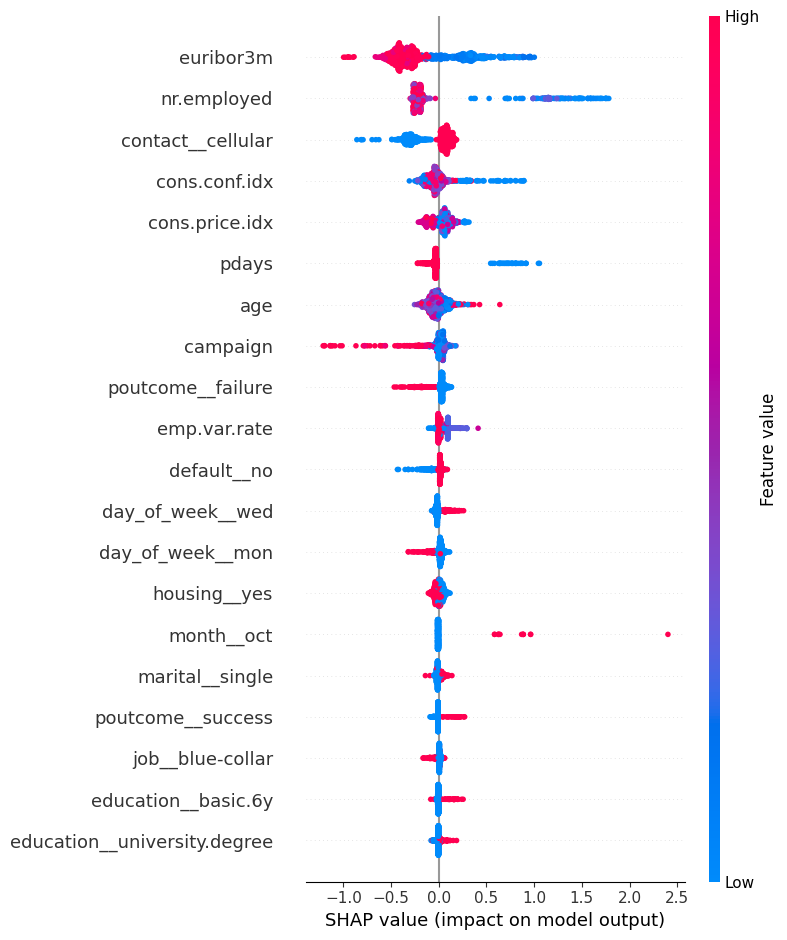

In [ ]:
shap.summary_plot(shap_values, features=observations, feature_names=all_features)

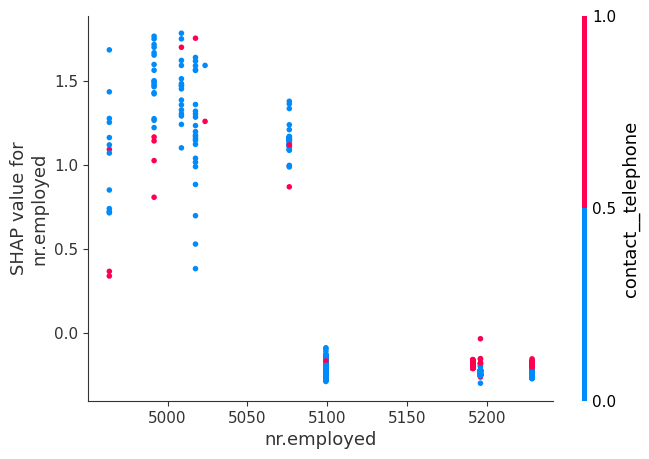

In [ ]:
shap.dependence_plot("nr.employed", shap_values, 
                     pd.DataFrame(observations, columns=all_features))